

# <center> Project 2 - WHOLESALE CUSTOMER  <center>

<hr style="border:2px  solid black"> </hr>


### TABLE OF CONTENTS
    
1. [Importing the Libraries](#lib_import)
2.[Exploring the 'Wholesale Customer' Dataset](#explore-ds)
3.[Data Preparation](#data_prep)
    * [Check for null values](#null)
    * [Check for outliers](#outliers)
    * [Target variable distribution](#imb)
    * [Check the distribution of data using histograms](#hist)
4. [Scaling the features](#sf)
    * [Standard Scaler](#SLR)
    *[MinMax Scaler](#mm)
    *[Visulaizing scaled and normalized data](#sn)
    *[BoxCox Transformation](#bx)
5. [RFECV](#rfecv)
6. [Elbow method and K-means clustering implementation](#km)
7. [PCA](#pca)
8. [Data Modelling](#dm)
    * [Train_test_split](#tts)
    * [Implementing XgBoost](#xgb)
    * [Cross Validation](#cv)
    * [Model Evaluation](#me)
9. [Conclusion](#cln)


<hr style="border:.1px  solid  gray"> </hr>

## <CENTER> IMPORTING THE LIBRARIES<a name="lib_import"></a>


<hr style="border:01px  solid gray"> </hr>

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import sklearn

#importing the library for visulasing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smq
%matplotlib inline

#importing librarues for scaling
from sklearn.preprocessing import StandardScaler

#importing library for train_test_split, cross validation and grid search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#importing Gradient Boosting algo and Kmeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans

#importing metrics for evaluation
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
from time import time
import joblib


In [2]:
#Reading the csv dataset
df = pd.read_csv('Wholesale_customers_data.csv')
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<hr style="border:01px  solid gray"> </hr>

## <center>EXPLORING THE WHOLESALE CUSTOMER DATASET<a name="explore-ds"></a>
    

<hr style="border:01px  solid gray"> </hr>

Here, we would be exploring the dataset in general, like the below: 

* Shape, column names and size of the dataset
* Unique values of target variable. 
* Descirptive statistics.
* Datatype and overview . 
* Count of values of each feature and the target variable.

In [3]:
df.shape

(440, 8)

In [4]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [7]:
df.Channel.unique()

array([2, 1], dtype=int64)

In [8]:
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [9]:
df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

***

**OBSERVATION**

* From the above cells, we infer that the Customer wholesale dataset has 440 rows with 8 columns. 
* In `cell 4`, the column names are retreived.
* The datatype is obtained from the `info()` keyword,in `cell5` which states they are numeric values(integer).
* In `cell 6`, `describe()` , shows the descriptive statistics of the data set. It is eveident that the overall values are monetary units and range beween 1.0 to 112151.0. 
* Also, in `cell 7` , we check for the unique values present in the categorical target feature `Channel'. 
* `Cell 8`, shows the  value_countss found in the variable `Region`. We can say the `Region` ranges from 1 to 3.


***

<hr style="border:01px  solid gray"> </hr>

## <center>DATA PREPARATION <a name="data_prep"></a>

<hr style="border:01px  solid gray"> </hr>


In this section, we will be performing data preparation steps like the below: 
1. [Check for null values](#null)
2. [Check for outliers](#outliers)
3. [Check for target variable distribution](#imb)
4. [Check the distribution of data using histograms](#hist)


***

### 1. Check for NULL , Nan and missing values : <a name="null"></a>

In [10]:
#check for null values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
#check for Nan values
df.isna().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [12]:
#duplicate values are checked for :
print("CHECK FOR DUPLICATE VALUES:\n",df.duplicated().value_counts())

CHECK FOR DUPLICATE VALUES:
 False    440
dtype: int64


***

<b>OBSERVATION:</b> 

* The above cells shows there is no missing value and no Nan, in the dataset indicating it's a clean dataset. 
* Duplicate values were also not found.  In `cell 12`, bool value `False = 440`is  returned.

***

###  2. Check for Outliers : <a name="outliers"></a>

In [13]:
# #Outlier detection
from collections import Counter
features = df.columns.values.tolist()
outlier_index = list()

for feature in features:
    
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    
    iqr = q3 - q1
    
    step = iqr * 1.5
    
    lower_bound = q1 - step
    upper_bound = q3 + step
    
# List of indices where the attribute value lies outside the bounds
feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
outlier_index.extend(feature_outliers)
outlier_index = Counter(outlier_index) 
outlier_list = [index for index, count in outlier_index.items() if count > 3]
print(f"Found {len(outlier_list)} outliers in the entire dataset.")

Found 0 outliers in the entire dataset.


***

<b>OBSERVATION:</b>

* In this section, outlier check is done in the 25th ,75th percentile boundary. 
* `Cell13`, shows 0 outliers are present above the range 3. 
* The shape is 440. 

***

### 3. Check for target variable distribution:

<a name="imb"></a>

<AxesSubplot:xlabel='Channel', ylabel='count'>

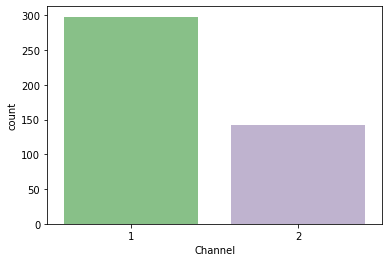

In [14]:
# To check for class imabalance distribution in target variable'Channel'
sns.countplot(x ='Channel' , data=df, palette="Accent" )




<AxesSubplot:xlabel='Channel', ylabel='Density'>

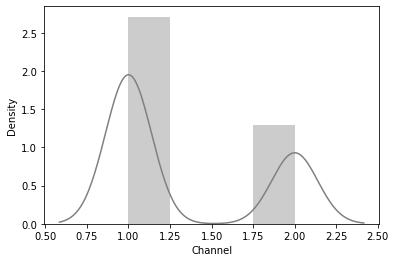

In [15]:
#checking  the frequency of the target variable- Quality
sns.distplot(df['Channel'], color= "gray")

***
<b>OBSERVATION:</b>

1. We have used a `distplot`, to depict the variations in the target variable- `Channel`. 
    * We observe that the dirstibution is more concentrated between 1- 1.25  and 1.75-2.0.

2. Next, to view the class imbalance, `countplot` is used.
    * It depicts that 1 has 298 and 2 has 142.
 
    
***

### 4. Histogram Plots:

<a name="hist"></a>

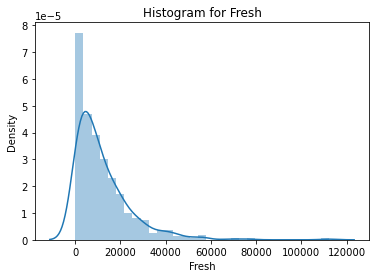

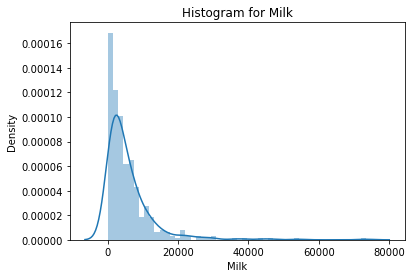

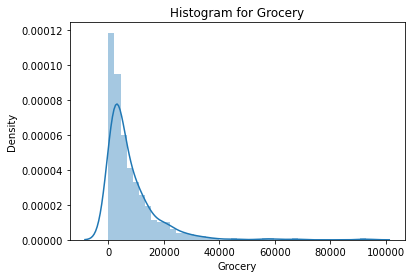

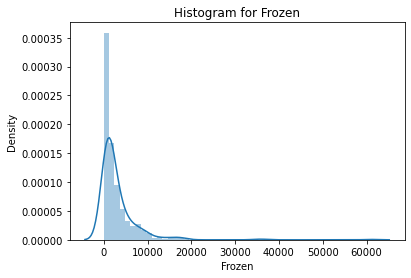

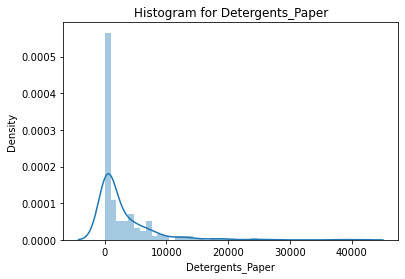

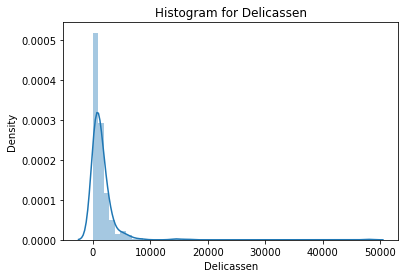

In [16]:
#histogram plotting using pandas

for feature in ["Fresh" , "Milk", "Grocery","Frozen","Detergents_Paper" , "Delicassen"]:
    sns.distplot(df[feature], kde=True)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

***

<b>OBSERVATION:</b>

From the above kde histogram, 
* We can infer that, most of the features are not evenly distributed. 
* Most of the features exhibits highest right skewness, from `cell 16`
* No signs of normal distribution.
* Kde hist plot is used.

<u>**NOTE**</u> Transforming the features would be mandatory to bring them in range prior prediction because of uneven distribution of the monetary units.



***

<hr style="border:01px  solid gray"> </hr>

## <center> FEATURE SCALING<a name="sf"></a>

<hr style="border:01px  solid gray"> </hr>


In this section, we will be applying both StandardSCaler and MinMAxScaler to check which best suits the model. 
1. [Standard Scaler](#SLR)
2. [MinMAx Scaler](#mm)
3. [Visulaizing original, scaled and normalized data](#sn)
4. [BoxCox Transformation](#bx)

In [17]:
ds = df.copy()

In [18]:
ds = ds.drop(ds[['Channel' , 'Region']], axis = 1)
ds.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


<AxesSubplot:title={'center':'BEFORE SCALING'}, ylabel='Density'>

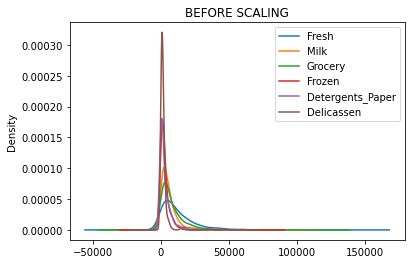

In [19]:
ds.plot(kind='kde' ,title = 'BEFORE SCALING')


### 1.Applying StandarScaler<a name="SLR"></a>

In [20]:
#importing standard scaler
from sklearn.preprocessing import StandardScaler

ds_scal = ds.copy()
scaled_data = StandardScaler().fit_transform(ds_scal)
scaled_data[:5]

scaled1 = pd.DataFrame(scaled_data)

<AxesSubplot:title={'center':'AFTER SCALING'}, ylabel='Density'>

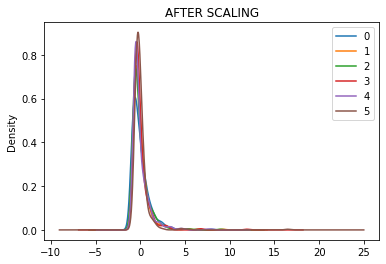

In [21]:
scaled1.plot(kind='kde' ,title = 'AFTER SCALING' )

In [22]:
scaled1.describe()

,0,1,2,3,4,5
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


### 2.Applying MinMAxScaler<a name="mm"></a>

In [23]:
#MinMAx Scaler
from sklearn.preprocessing import MinMaxScaler

ds_norm = ds.copy()
norm_data = MinMaxScaler().fit_transform(ds_norm)
norm_data[:5]
norm1 = pd.DataFrame(norm_data)

<AxesSubplot:title={'center':'AFTER NORMALIZING'}, ylabel='Density'>

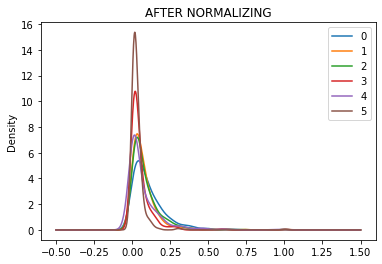

In [24]:
norm1.plot(kind='kde' , title = 'AFTER NORMALIZING')

In [25]:
norm1.describe()


,0,1,2,3,4,5
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.Visualizing the original and transformed  data<a name="sn"></a>

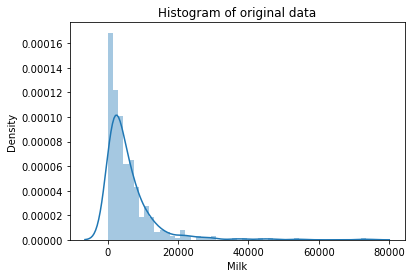

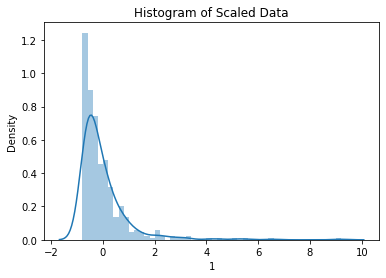

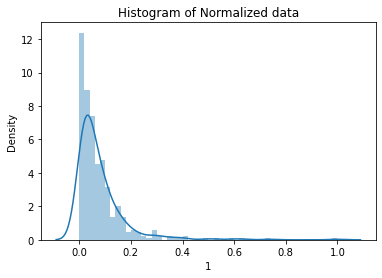

In [26]:
sns.distplot(ds['Milk'], kde=True)
plt.title('Histogram of original data')
plt.show()


sns.distplot(scaled1[1], kde=True)
plt.title('Histogram of Scaled Data' )
plt.show()


sns.distplot(norm1[1], kde=True)
plt.title('Histogram of Normalized data')
plt.show()

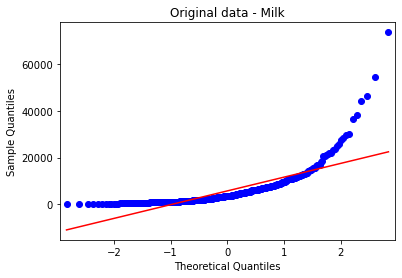

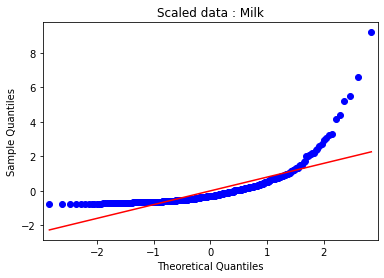

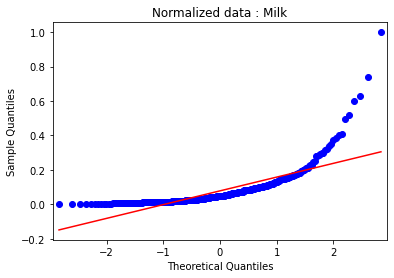

In [27]:
smq.qqplot(df["Milk"], line ='r')
plt.title("Original data - Milk")
plt.show()

smq.qqplot(scaled1[1], line ='r')
plt.title('Scaled data : Milk')
plt.show()

smq.qqplot(norm1[1],  line ='r')
plt.title('Normalized data : Milk')
plt.show()


<hr style="border:.03px  solid black"> </hr>

**OBSERVATION**

* We will be using **standard Scaler** as we have to scale monetary units of same range. From  kde, we can infer that it is within a range unlike MinMAx which is elongated. 
* Also as we are using k-means, i.e., Euclidean distance based measurement ,we need to standardize the weights(region and price).

* Additionally, standarizaton handles outliers well unlike normalization.Also Scaler helps to to have the same weightage. They are all similar features, that is currency and not different features like age, income which will cost he model. Hence StandardSCaler is being used her. 

NOTE: But we also , observe that from `cell 26` and `cell 27`, neither standardScaler and MinMax has helped to overcom the scaling. Therefore we will be using BoxCOx with standardScaler to bring them within range . 

<hr style="border:.03px  solid black"> </hr>


### 4.Applying BoxCox Transformation<a name="bx"></a>

In [28]:
box_scal = df.copy()
box_scal = box_scal.drop(box_scal[["Channel" , "Region"]] , axis= 1)
box_scal.tail(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125
439,2787,1698,2510,65,477,52


In [29]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

bc = PowerTransformer(method='box-cox')
wholesale_boxcox = bc.fit_transform(box_scal)

sc = StandardScaler()
wholesale_processed = sc.fit_transform(wholesale_boxcox)

wholesale_processed_df = pd.DataFrame(wholesale_processed, columns=box_scal.columns)
wholesale_processed_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.412646,0.979303,0.392937,-1.456705,0.617238,0.335779
1,-0.111180,0.995096,0.626729,0.079718,0.748629,0.599877
2,-0.196043,0.887891,0.408738,0.331996,0.790324,2.245295
3,0.457763,-0.965094,-0.156523,1.173643,-0.373844,0.606332
4,1.028704,0.412455,0.344961,0.741520,0.364211,1.738881
...,...,...,...,...,...,...
435,1.357112,1.201976,1.164326,1.839607,-0.935948,0.811050
436,1.720545,-0.808552,-1.550221,0.863813,-1.285593,0.873759
437,0.549059,1.458163,1.876742,-0.968503,1.750367,0.647978
438,0.216004,-0.519911,-0.712014,-0.333575,-0.978393,0.774734


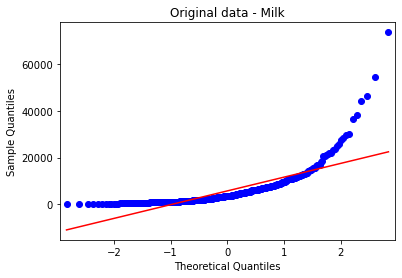

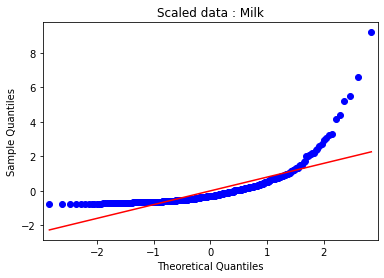

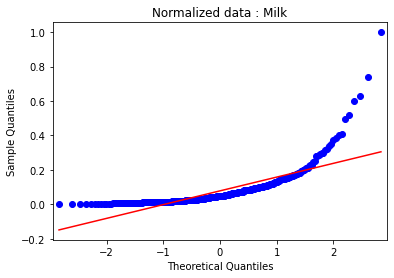

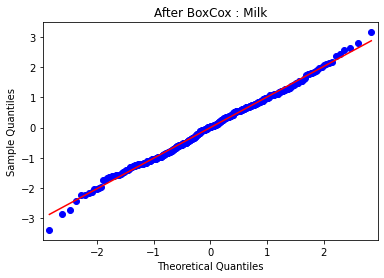

In [30]:
smq.qqplot(df["Milk"], line ='r')
plt.title("Original data - Milk")
plt.show()

smq.qqplot(scaled1[1], line ='r')
plt.title('Scaled data : Milk')
plt.show()

smq.qqplot(norm1[1],  line ='r')
plt.title('Normalized data : Milk')
plt.show()

smq.qqplot(wholesale_processed_df["Milk"], line ='r')
plt.title('After BoxCox : Milk')
plt.show()

***

<b>OBSERVATION:</b>

From the above histogram, 
* We can infer that,after boxcox, data fits well.
* Now we are good to proceed with.
***


<hr style="border:01px  solid gray"> </hr>

## <center>Ranking with recursive Feature Elimination and Cross-Validated selection (RFECV)</center> <a name="rfecv"></a>

<hr style="border:01px  solid gray"> </hr>




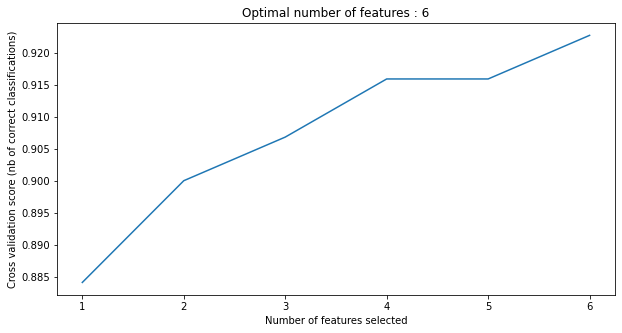

In [31]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(max_depth=15, random_state=1)
rfecv = RFECV(estimator=rf)
rfecv.fit(wholesale_processed_df, df.Channel)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

***

**OBSERVATION:**

* RFECV is applied to find the optimal features.
* We see that all 6 are important and should be considered.
* More the number of features, higher the cv score is. 
* However, with  4 and 5 features, the cv score is same and is increased with the 6th .
* Hence we will be considering all the 6 features in ur modelling.



<hr style="border:01px  solid gray"> </hr>

## <center>ELBOW METHOD & IMPLEMENTING K-MEANS <a name="km"></a>

<hr style="border:01px  solid gray"> </hr>


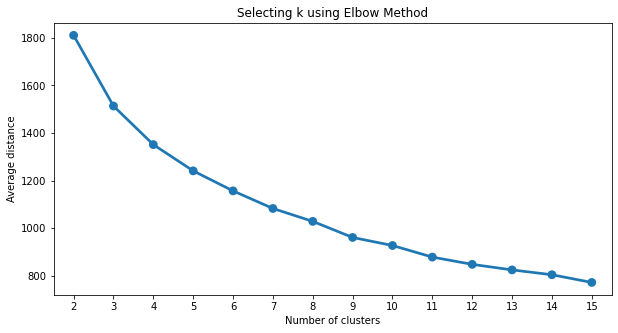

In [32]:
from sklearn.cluster import KMeans

sse = {}

for k in range(2,16):
    kmeans = KMeans(n_clusters = k, random_state=123)
    cluster_labels = kmeans.fit_predict(wholesale_processed_df)
    sse[k] = kmeans.inertia_
   
plt.figure(figsize=(10,5))
plt.title('Selecting k using Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))

plt.show()


In [33]:
# Interpret 3 cluster solution

from sklearn.cluster import KMeans

# Interpret 3 cluster solution
mode3Cluster = KMeans(n_clusters=3)
mode3Cluster.fit(wholesale_processed_df)
preds=mode3Cluster.predict(wholesale_processed_df)



In [34]:
mode3Cluster.cluster_centers_

array([[-0.5739327 ,  0.83205308,  0.99906216, -0.60220642,  1.06131932,
        -0.03713531],
       [ 0.96773124,  0.41462223,  0.20127467,  0.9021028 , -0.01445033,
         0.98429607],
       [-0.02477891, -0.73438506, -0.756101  ,  0.02201884, -0.70647593,
        -0.39222034]])

In [35]:
mode3Cluster.labels_

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2,
       1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1,
       2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       2, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1,

***

**OBSERVATION:**

* Elbow method is applied to find out the optimal clusters needed within the given range (2-15).
* We see from `cell 32` , three would be the approprite number of clusters.
* K-means clustering is applied on the `whole_processed_df`with `n_clusters=3`.
* With `cluster_centers_` , the centroids values are got. 

<hr style="border:.03px  solid black"> </hr>

<hr style="border:01px  solid gray"> </hr>

## <center>PCA <a name="pca"></a>

<hr style="border:01px  solid gray"> </hr>


In [36]:
#PCA implementation
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
principalComponents = pca.fit_transform(wholesale_processed_df)
PCA_components = pd.DataFrame(principalComponents)

In [37]:
pca.explained_variance_ratio_


array([0.44889984, 0.28002326, 0.10189812, 0.09626769, 0.04639271,
       0.02651837])

Text(0, 0.5, 'Cumulative Explained Variance')

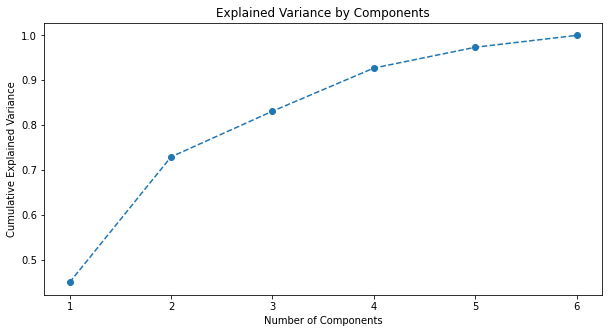

In [38]:
#plotting Explained Variance
plt.figure(figsize = (10,5))
plt.plot(range(1,7),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [39]:
#Components indexing
dimensions = ['Component {}'.format(i) for i in range(1,(pca.n_components_)+1)]
var = pd.DataFrame(pca.explained_variance_ratio_, columns = ['Explained Variance'] , index = dimensions)
var


,Explained Variance
Component 1,0.448900
Component 2,0.280023
Component 3,0.101898
Component 4,0.096268
Component 5,0.046393
Component 6,0.026518


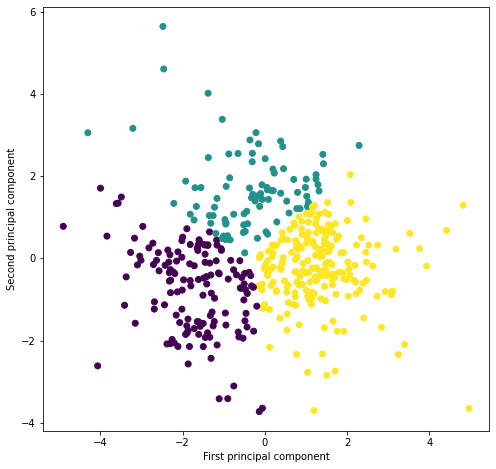

In [40]:
# plot 1st vs 2nd principal component to visualize cluster formation
PCA_components = pd.DataFrame(principalComponents)
plt.figure(figsize=(8, 8))
plt.scatter(PCA_components[0], PCA_components[1], c=mode3Cluster.labels_)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

<hr style="border:.03px  solid black"> </hr>

**OBSERVATION**

* Initially, PCA is applied considering all the features of the dataset in `cell 36`.
* In `cell 37`, explained variance is got. 
* In `cell 38` , plotting of explained variance by components is visualized. 
* we can infer from `cell 39` that, the first two components are able to retain the original information accounting to 72% of the total and the first 4 components to 92.6% of the total.
* In `cell 40`, visualization of clusters are donen suing scatter plot with first and second components. 
* We see that 3 clusters looks reasonable to identify similar samples within our data.
***


<hr style="border:01px  solid gray"> </hr>

## <center>DATA MODELLING<a name="dm"></a>

<hr style="border:01px  solid gray"> </hr>

In DataModelling, the following steps are performed
1. [Train_test_split](#tts)
2. [Implementing XgBoost](#xgb)
3. [Cross Validation](#cv)
4. [Model evaluation](#me)
    

###  1. Train_Test_Split: <a name="tts"></a>

In [41]:
#splitting features and traget variable
X = df.drop('Channel', axis=1)
y = df['Channel']

In [42]:
#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
# shape of the dataset
print('Shape of training data :',X_train.shape)
print('Shape of testing data :',X_test.shape)

Shape of training data : (352, 7)
Shape of testing data : (88, 7)


### 2.Implementing XgBoost.<a name="xgb"></a>

In [44]:
# import XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# declare parameters in dict
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

[03:49:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\Anacondaaa\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
# we can view the parameters of the xgb trained model as follows 
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [46]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)
y_pred

array([2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1],
      dtype=int64)

In [47]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9091


### 3. Cross Validation: <a name="cv"></a> 

In [48]:
#label must be in [0,1] for logistic regression for xgBoost-Dmatrix. it won't acceot anything but 0,1. Hence we will be converting 1 and 2 to 0 and 1.

# convert labels into binary values
y_train.head(5)
y_train[y_train == 2] = 0
y_train[y_train == 1] = 1

In [49]:
y_train

45     0
264    0
4      0
236    1
432    1
      ..
323    1
192    1
117    1
47     0
172    1
Name: Channel, Length: 352, dtype: int64

In [50]:
#dTrain 
import xgboost as xgb
data_train = xgb.DMatrix(X_train, y_train)

In [51]:
from xgboost import cv

params = {"objective":"binary:logistic",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth':5, 
          'alpha': 10
         }

In [52]:
#applying cv
xgb_cv = cv(dtrain=data_train, params=params , nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

### 4.Model evaluation<a name="me"></a>

In [53]:
print("Average cross validation score for XgBoost is:\n",xgb_cv.mean())

Average cross validation score for XgBoost is:
 train-auc-mean    0.960719
train-auc-std     0.008050
test-auc-mean     0.931031
test-auc-std      0.035002
dtype: float64


In [54]:
print("Cross validation scores:\n",xgb_cv.tail())

Cross validation scores:
     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
45        0.967704       0.006021       0.938645      0.034519
46        0.967728       0.006006       0.939000      0.034764
47        0.967804       0.006042       0.939000      0.034764
48        0.967849       0.006102       0.939000      0.034764
49        0.967896       0.006100       0.939213      0.034633


In [55]:
print((xgb_cv["test-auc-mean"]).tail(1))

49    0.939213
Name: test-auc-mean, dtype: float64


<hr style="border:.03px  solid black"> </hr>

**OBSERVATION**


* With **Train_Test_Split**, the train set is 80% and test set is 20%. 
* When **Xgboost** was implemented on the dataset, an accuracy score of 90.91% was achieved, which can be infered from `cell47`.
* So as to improve  XgBoost’s performance and efficiency, `DMatrix` is used. We will be acheiving this by using the Xgboots' Dmatrix functionality. 
* `params` dictionary is set to hold all the parameters .  `num_boost_rounds` is used to set the number of boosting iteration. `early_stopping_rounds`- activates the stoppping rounds. `metrics` used will be "auc" curve as it is a classification problem. 
* In `cell 52` , **xgboost CV** is applied. 
* In `cell53` ,the average of **CV** scores are printed. 
* In `cell54` , cv scores are printed. 
* Evaluation Metrics is done with 'AUC' has with AUC, the performance of the classifier will not be biased on the test data size. Also, with each round, the score is increased. 

<hr style="border:.03px  solid black"> </hr>


<hr style="border:01px  solid gray"> </hr>

## <center>CONCLUSION<a name="cln"></a>
    
<hr style="border:01px  solid gray"> </hr>

>With regards to clustering, we can conclude that 3 clusters are ideal for this wholesale customer dataset. 
>Also, with RFECV we can conclude that all features are vital. 
>With regard to Xgboost, From the above implementation and evalutaion, we can say for this particular model of implementing Xgboost models, the maximum score achievable is 93%.  
>We see that , with normal implementation without any tuning, is 90%. However, with Dtrain cv, we see that the maximum achievable accuracy_Score is is 93.9%. 